In [1]:
#!python prepare_data_spleen.py

In [2]:
from cnn.model import build_net
from cnn.input import Dataloader, SpleenDataset, get_train_val_filenames, get_training_augmentation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import random

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
#   except RuntimeError as e:
#     print(e)

2022-08-22 08:28:55.894752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 08:28:55.924511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 08:28:55.924634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
data_path = './data/Task09_Spleen_2D'

image_size = 128
batch_size = 1
num_classes = 2

augmentation = get_training_augmentation(image_size, image_size)

In [4]:
train_images_filepaths, val_images_filepaths, train_labels_filepaths, val_labels_filepaths = get_train_val_filenames(data_path)

train_dataset = SpleenDataset(train_images_filepaths, train_labels_filepaths, augmentation)
val_dataset = SpleenDataset(val_images_filepaths, val_labels_filepaths)

train_dataloader = Dataloader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = Dataloader(val_dataset, batch_size=batch_size, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/Task09_Spleen_2D/dataset.json'

In [ ]:
len(train_dataset)

847

In [ ]:
len(train_dataloader)

26

(128, 128, 1)
(128, 128, 1)


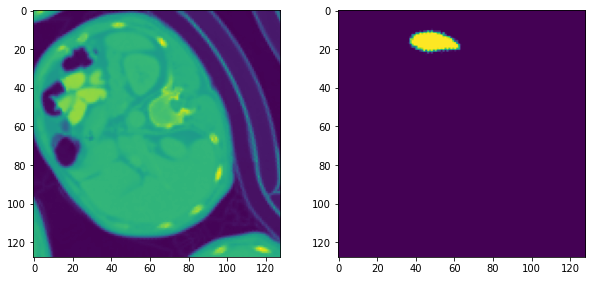

In [ ]:
id = random.randint(0, len(train_dataset))
image, label = train_dataset[id]

print(image.shape)
print(label.shape)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)

In [ ]:
net_list = [
    'vgg_3_1_32', 
    'vgg_3_1_64',
    'vgg_3_1_128',
    'vgg_3_1_256',
    'vgg_3_1_512',
    'vgg_3_1_256',
    'vgg_3_1_128',
    'vgg_3_1_64',
    'vgg_3_1_32'
]

fn_dict = {
    'vgg_1_1_32':       {'block': 'VGGBlock',       'params': {'kernel': 1, 'filters': 32},     'prob': 0.05},
    'vgg_1_1_64':       {'block': 'VGGBlock',       'params': {'kernel': 1, 'filters': 64},     'prob': 0.05},
    'vgg_3_1_32':       {'block': 'VGGBlock',       'params': {'kernel': 3, 'filters': 32},     'prob': 0.05},
    'vgg_3_1_64':       {'block': 'VGGBlock',       'params': {'kernel': 3, 'filters': 64},     'prob': 0.05},
    'vgg_3_1_128':      {'block': 'VGGBlock',       'params': {'kernel': 3, 'filters': 128},    'prob': 0.05},
    'vgg_3_1_256':      {'block': 'VGGBlock',       'params': {'kernel': 3, 'filters': 256},    'prob': 0.05},
    'vgg_3_1_512':      {'block': 'VGGBlock',       'params': {'kernel': 3, 'filters': 256},    'prob': 0.05},
    'vgg_5_1_32':       {'block': 'VGGBlock',       'params': {'kernel': 5, 'filters': 32},     'prob': 0.05},
    'vgg_5_1_64':       {'block': 'VGGBlock',       'params': {'kernel': 5, 'filters': 64},     'prob': 0.05},
    'vgg_5_1_128':      {'block': 'VGGBlock',       'params': {'kernel': 5, 'filters': 128},    'prob': 0.05},
    'vgg_5_1_256':      {'block': 'VGGBlock',       'params': {'kernel': 5, 'filters': 256},    'prob': 0.05},
    'resnet_1_1_32':    {'block': 'ResNetBlock',    'params': {'kernel': 1, 'filters': 32},     'prob': 0.05},
    'resnet_1_1_64':    {'block': 'ResNetBlock',    'params': {'kernel': 1, 'filters': 64},     'prob': 0.05},
    'resnet_3_1_32':    {'block': 'ResNetBlock',    'params': {'kernel': 3, 'filters': 32},     'prob': 0.05},
    'resnet_3_1_64':    {'block': 'ResNetBlock',    'params': {'kernel': 3, 'filters': 64},     'prob': 0.05},
    'resnet_3_1_128':   {'block': 'ResNetBlock',    'params': {'kernel': 3, 'filters': 128},    'prob': 0.05},
    'resnet_3_1_256':   {'block': 'ResNetBlock',    'params': {'kernel': 3, 'filters': 256},    'prob': 0.05},
    'resnet_5_1_32':    {'block': 'ResNetBlock',    'params': {'kernel': 5, 'filters': 32},     'prob': 0.05},
    'resnet_5_1_64':    {'block': 'ResNetBlock',    'params': {'kernel': 5, 'filters': 64},     'prob': 0.05},
    'resnet_5_1_128':   {'block': 'ResNetBlock',    'params': {'kernel': 5, 'filters': 128},    'prob': 0.05},
    'resnet_5_1_256':   {'block': 'ResNetBlock',    'params': {'kernel': 5, 'filters': 256},    'prob': 0.05},
      }

In [ ]:
model = build_net((image_size, image_size, 1), num_classes, fn_dict, net_list)
# model.summary()

2022-08-12 20:44:06.156564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-12 20:44:06.157177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:44:06.157332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:44:06.157491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [ ]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image

# plot_model(model,
#            to_file='model.png',
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir='TB'
#             )
# Image('model.png')

In [ ]:
history = model.fit(
    train_dataloader,
    validation_data=val_dataloader,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor="val_loss", mode="min", verbose=1, patience=5
        ),
        ModelCheckpoint(
            "best_model.h5",
            save_best_only=True,
            monitor="val_loss",
            mode="min",
        ),
        TensorBoard(log_dir="./logs")
    ],
)

Epoch 1/100


2022-08-12 20:44:10.295982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-08-12 20:44:11.305438: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


26/26 [==============================] - 9s 97ms/step - loss: 0.9659 - gen_dice_coef: 0.0341 - val_loss: 0.9427 - val_gen_dice_coef: 0.0573
Epoch 2/100
26/26 [==============================] - 2s 80ms/step - loss: 0.8606 - gen_dice_coef: 0.1394 - val_loss: 0.7346 - val_gen_dice_coef: 0.2654
Epoch 3/100
26/26 [==============================] - 2s 77ms/step - loss: 0.6425 - gen_dice_coef: 0.3575 - val_loss: 0.5270 - val_gen_dice_coef: 0.4730
Epoch 4/100
26/26 [==============================] - 2s 75ms/step - loss: 0.4613 - gen_dice_coef: 0.5387 - val_loss: 0.4005 - val_gen_dice_coef: 0.5995
Epoch 5/100
26/26 [==============================] - 2s 79ms/step - loss: 0.3838 - gen_dice_coef: 0.6162 - val_loss: 0.3362 - val_gen_dice_coef: 0.6638
Epoch 6/100
26/26 [==============================] - 2s 82ms/step - loss: 0.2822 - gen_dice_coef: 0.7178 - val_loss: 0.2390 - val_gen_dice_coef: 0.7610
Epoch 7/100
26/26 [==============================] - 2s 82ms/step - loss: 0.2344 - gen_dice_coef: 0.

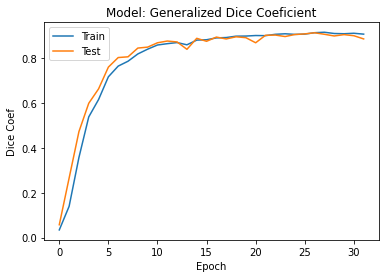

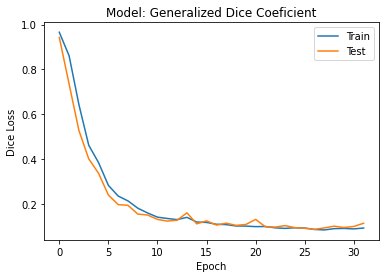

In [ ]:
# plotting the dice coeff results (accuracy) as a function of the number of epochs
plt.figure()
plt.plot(history.history['gen_dice_coef'])
plt.plot(history.history['val_gen_dice_coef'])
plt.title('Model: Generalized Dice Coeficient')
plt.ylabel('Dice Coef')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plotting the dice coeff results (loss function) as a function of the number of epochs
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model: Generalized Dice Coeficient')
plt.ylabel('Dice Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
!tensorboard --logdir='./logs'

2022-08-12 20:45:19.278008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:45:19.304717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 20:45:19.304863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.1 at http://localhost:6006/ (Press CTRL